# HackerEarth Deep Learning Competition : Friendship Goals 
- We have to classify whether the images are of adults , teenagers or toddlers
- We will use transfer learning

In [2]:
import numpy as np
import pandas as pd

import keras
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input,decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19, decode_predictions
from tensorflow.keras.applications.resnet import ResNet50, decode_predictions

Using TensorFlow backend.


In [3]:
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D,BatchNormalization, Dropout, Conv2D
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV

In [4]:
import os
train_dir = os.path.join("Train Data")
test_dir = os.path.join("Test Data")

from glob import glob

folders = glob("Train Data/*")

In [5]:
validation_dir = os.path.join("Validation Data")

In [6]:
train_adults_dir = os.path.join(train_dir, "Adults")

In [7]:
train_teenagers_dir = os.path.join(train_dir, "Teenagers")
train_toddler_dir = os.path.join(train_dir, "Toddler")

In [8]:
val_adults_dir = os.path.join(validation_dir, "Adults")
val_teenagers_dir = os.path.join(validation_dir, "Teenagers")
val_toddler_dir = os.path.join(validation_dir, "Toddler")

In [9]:
print(f"The number of adults images in training set is {len(os.listdir(train_adults_dir))}")
print(f"The number of teenagers images in training set is {len(os.listdir(train_teenagers_dir))}")
print(f"The number of toddler images in training set is {len(os.listdir(train_toddler_dir))}")
print()
print(f"The number of adults images in validation set is {len(os.listdir(val_adults_dir))}")
print(f"The number of teenagers images in validation set is {len(os.listdir(val_teenagers_dir))}")
print(f"The number of toddler images in validation set is {len(os.listdir(val_toddler_dir))}")

The number of adults images in training set is 523
The number of teenagers images in training set is 544
The number of toddler images in training set is 352

The number of adults images in validation set is 138
The number of teenagers images in validation set is 150
The number of toddler images in validation set is 121


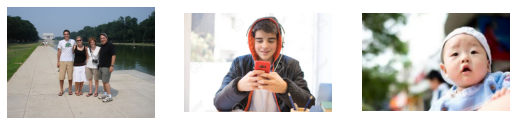

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 3
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

train_adults_names = os.listdir(train_adults_dir)
train_teenagers_names = os.listdir(train_teenagers_dir)
train_toddler_names = os.listdir(train_toddler_dir)

pic_index += 3

next_adult_pix = [os.path.join(train_adults_dir, fname) 
                for fname in train_adults_names[pic_index-1:pic_index]]
next_teenager_pix = [os.path.join(train_teenagers_dir, fname) 
                for fname in train_teenagers_names[pic_index-1:pic_index]]
next_toddler_pix = [os.path.join(train_toddler_dir, fname) 
                for fname in train_toddler_names[pic_index-1:pic_index]]

for i, img_path in enumerate(next_adult_pix+next_teenager_pix+next_toddler_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.xlabel(next_adult_pix)

plt.show()

In [11]:
train_datagen = ImageDataGenerator(rotation_range=5,
    width_shift_range=5,
    rescale=1/255,
    fill_mode="nearest",
    horizontal_flip=True,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1/255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224,224), class_mode="categorical")

val_generator = val_datagen.flow_from_directory(validation_dir, target_size=(224,224),class_mode="categorical")

Found 1273 images belonging to 3 classes.
Found 398 images belonging to 3 classes.


In [13]:
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in base_model.layers:
    layer.trainable=False

In [14]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model

x = Flatten()(base_model.output)
# x = Dense(512, activation="relu")(x)
# x = Dropout(0.25)(x)
# x = Dense(1024, activation="relu")(x)
# x = Dropout(0.25)(x)
x = Dense(3, activation="softmax")(x)

model = Model( base_model.input, x) 


# model= Sequential([
#     Conv2D(64, (3,3), input_shape=(224,224,3), activation="relu"),
#     BatchNormalization(),
#     Dropout(0.25),
#     MaxPool2D((2,2), padding="same"),
    
#     Conv2D(64, (3,3),  activation="relu"),
#     BatchNormalization(),
#     Dropout(0.25),
#     MaxPool2D((2,2), padding="same"),
    
#     Conv2D(128, (3,3), activation="relu"),
#     BatchNormalization(),
#     Dropout(0.25),
#     MaxPool2D((2,2), padding="same"),
    
#     Conv2D(128, (3,3), activation="relu"),
#     BatchNormalization(),
#     Dropout(0.25),
#     MaxPool2D((2,2), padding="same"),
    
#     Flatten(),
#     Dense(512, activation="relu"),
#     Dropout(0.25),
#     Dense(1024, activation="relu"),
#     Dropout(0.25),
#     Dense(len(folders), activation="softmax")
    
# ])
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = "adam", 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [36]:
history = model.fit_generator(
  train_generator,
  validation_data=val_generator,
  epochs=3,
  verbose=1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 40 steps, validate for 13 steps
Epoch 1/3
40/40 [==============================] - 163s 4s/step - loss: 0.9375 - accuracy: 0.7934 - val_loss: 2.6051 - val_accuracy: 0.7035
Epoch 2/3
40/40 [==============================] - 156s 4s/step - loss: 1.1627 - accuracy: 0.7651 - val_loss: 3.5187 - val_accuracy: 0.6784
Epoch 3/3
40/40 [==============================] - 165s 4s/step - loss: 0.9347 - accuracy: 0.8123 - val_loss: 3.3526 - val_accuracy: 0.7111


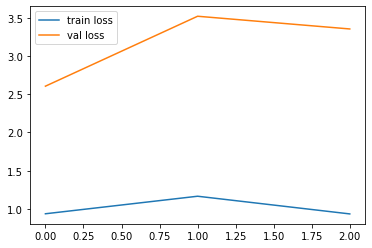

In [37]:
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend()

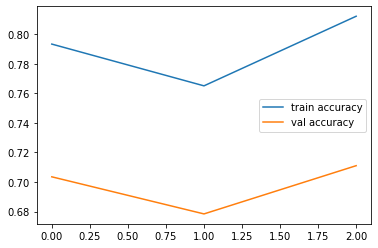

In [38]:
plt.plot(history.history['accuracy'], label="train accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.legend()

In [39]:
test_dir = os.path.join("Test Data")
test_name = os.listdir('Test Data')

In [40]:
train_generator.class_indices

{'Adults': 0, 'Teenagers': 1, 'Toddler': 2}

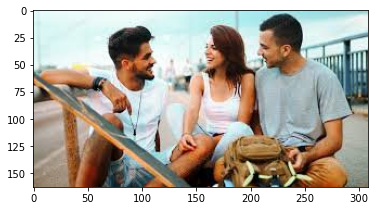

(224, 224, 3)
(1, 224, 224, 3)
[[0.98043376 0.01692117 0.00264506]]
[0]


In [41]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input

#name=os.listdir(test_dir)
img1 = mpimg.imread(os.path.join(test_dir, test_name[11]))
plt.imshow(img1)

plt.show()
# pred=[]
# img_name = []
# for img in test

img = load_img(os.path.join(test_dir, test_name[11]),target_size=(224,224))
img_arr = img_to_array(img)
img_arr = img_arr/255
print(img_arr.shape)

x=np.expand_dims(img_arr,axis=0)
img_data=preprocess_input(x)
print(img_data.shape)

y_pred = model.predict(img_data)
print(y_pred)
print(np.argmax(model.predict(img_data), axis=1))

In [48]:
from tensorflow.keras.models import load_model

model = load_model("Friendship_DL_InceptionV3.h5")

In [49]:
preds=[]
img_names=[]
for image in test_name:
    img_names.append(image)
    img = load_img(os.path.join("Test Data",image), target_size=(224,224))
    img_arr = img_to_array(img)
    img_arr = img_arr/255

    x=np.expand_dims(img_arr,axis=0)
    img_data=preprocess_input(x)
    y_pred = model.predict(img_data)
    pred = np.argmax(y_pred, axis=1)
    
    if pred[0] == 0:
        preds.append("Adults")
        
    elif pred[0] == 1:
        preds.append("Teenagers")
        
    else:
        preds.append("Toddler")

In [50]:
sub=pd.DataFrame({"Filename":img_names, "Category":preds})

In [51]:
sub[sub['Category']=="Teenagers"]

,Filename,Category
0,Img1001.jpg,Teenagers
1,Img1017.jpg,Teenagers
2,Img1020.jpg,Teenagers
3,Img1025.jpg,Teenagers
4,Img1038.jpg,Teenagers
...,...,...
309,Img7681.jpg,Teenagers
310,Img7683.jpg,Teenagers
311,Img7862.jpg,Teenagers
312,Img7867.jpg,Teenagers


In [52]:
sub['Category'].value_counts()

Teenagers    268
Adults        27
Toddler       19
Name: Category, dtype: int64

In [53]:
sub[sub['Category']=="Adults"]

,Filename,Category
12,Img1114.jpg,Adults
27,Img1208.jpg,Adults
32,Img1279.jpg,Adults
54,Img1417.jpg,Adults
63,Img1488.jpg,Adults
69,Img1562.jpg,Adults
99,Img1826.jpg,Adults
101,Img1844.jpg,Adults
104,Img1851.jpg,Adults
110,Img1915.jpg,Adults


In [54]:
sub[sub['Category'] == "Toddler"]

,Filename,Category
14,Img1122.jpg,Toddler
16,Img1137.jpg,Toddler
26,Img1186.jpg,Toddler
45,Img1369.jpg,Toddler
174,Img2485.jpg,Toddler
187,Img2813.jpg,Toddler
190,Img2924.jpg,Toddler
195,Img3026.jpg,Toddler
209,Img3211.jpg,Toddler
212,Img3350.jpg,Toddler


In [56]:
sub['Category'] = sub['Category'].replace("Toddler","Teenagers")

In [57]:
sub['Category'].value_counts()

Teenagers    287
Adults        27
Name: Category, dtype: int64

In [58]:
sub.to_csv("sub2.csv", index=False)